In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("/Users/ruthwetters/Downloads/dfenglish.csv")

/Users/ruthwetters/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
df

,Unnamed: 0,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,...,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,...,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,...,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956469,2727511,1673956951,_SOLOMONALBERT_,These police are train killers. I don’t shed a...,United States,English,8/9/2015 16:15,8/9/2015 16:15,102,72,...,Left,1,LeftTroll,0,1673956951,630411969074298880,http://twitter.com/_SolomonAlbert_/statuses/63...,NaN,NaN,NaN
1956470,2727512,1673956951,_SOLOMONALBERT_,#BUT - @FloydMayweather Retires From #Boxing ...,United States,English,9/14/2015 8:07,9/14/2015 8:09,100,74,...,Left,1,LeftTroll,0,1673956951,643335241025875968,http://twitter.com/_SolomonAlbert_/statuses/64...,https://twitter.com/BestUSAToday/status/643108...,http://bit.ly/1i8QN5B,NaN
1956471,2727513,1673956951,_SOLOMONALBERT_,No guns allowed to all people. Especially #bla...,United States,English,9/19/2015 8:23,9/19/2015 8:23,100,72,...,Left,1,LeftTroll,0,1673956951,645151212350799873,http://twitter.com/_SolomonAlbert_/statuses/64...,NaN,NaN,NaN
1956472,2727514,1673956951,_SOLOMONALBERT_,Support the #petition that banns providing #bl...,United States,English,9/19/2015 8:23,9/19/2015 8:24,100,72,...,Left,1,LeftTroll,0,1673956951,645151309989982209,http://twitter.com/_SolomonAlbert_/statuses/64...,NaN,NaN,NaN


In [40]:
import os
os.chdir('..')

In [41]:
df = df.drop(columns=['external_author_id', 'harvested_date', 'new_june_2018','alt_external_id','tweet_id','article_url','tco1_step1','tco2_step1','tco3_step1'], axis=1).sample(100)

In [49]:
# Load the regular expression library
import re
# Remove punctuation
df['paper_text_processed'] = \
df['content'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['paper_text_processed'] = \
df['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['paper_text_processed'].head()

<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-49-c2bfc650436c>:5: DeprecationWarning: invalid escape sequence \.
  df['content'].map(lambda x: re.sub('[,\.!?]', '', x))
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruthwetters/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


357112     huffpo writer claims standing for the anthem i...
1640630    greece says expects bailout deal by aug 18  #news
1273986    don't want to watch the #tensingtrial check ou...
171162     #politics scientists race to decode secrets of...
1743215    kerry: terrorist groups like isis and al-nusra...
Name: paper_text_processed, dtype: object

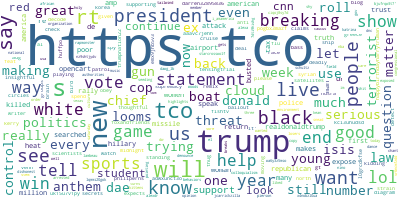

In [50]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [44]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [45]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['tco','https','http'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['huffpo', 'writer', 'claims', 'standing', 'anthem', 'supporting', 'white', 'supremacy', 'kci', 'uhudsd']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruthwetters/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [47]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"live" + 0.006*"project" + 0.006*"trey" + 0.006*"denver" + '
  '0.006*"retirement" + 0.006*"hhwgwuagri" + 0.006*"wild" + 0.006*"good" + '
  '0.006*"gowdy" + 0.006*"huckabee"'),
 (1,
  '0.018*"trump" + 0.013*"know" + 0.009*"fm" + 0.009*"see" + 0.009*"news" + '
  '0.009*"week" + 0.009*"even" + 0.009*"lives" + 0.009*"red" + '
  '0.005*"sfjlbnbwl"'),
 (2,
  '0.014*"news" + 0.014*"coast" + 0.008*"women" + 0.007*"winning" + '
  '0.007*"vdmtwc" + 0.007*"pjnet" + 0.007*"poverty" + 0.007*"million" + '
  '0.007*"entities" + 0.007*"win"'),
 (3,
  '0.014*"trump" + 0.014*"white" + 0.008*"planted" + 0.008*"destroyed" + '
  '0.008*"sports" + 0.008*"drug" + 0.008*"documents" + 0.008*"chief" + '
  '0.008*"ex" + 0.008*"trust"'),
 (4,
  '0.014*"end" + 0.014*"truth" + 0.007*"rt" + 0.007*"scotland" + '
  '0.007*"praised" + 0.007*"terror" + 0.007*"kyuy" + 0.007*"intimidated" + '
  '0.007*"searched" + 0.007*"de"'),
 (5,
  '0.010*"ur" + 0.010*"black" + 0.010*"killed" + 0.010*"people" + 0.010*"ma

In [48]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/Users/ruthwetters/Downloads/'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
#pyLDAvis.save_html(LDAvis_prepared, '/Users/ruthwetters/Downloads/ldavis'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.117934  0.135798       1        1  15.776261
8      0.150946  0.034253       2        1  13.920836
5     -0.080422 -0.140838       3        1  13.636257
0      0.011416 -0.030340       4        1   9.770410
9      0.007389  0.022477       5        1   9.641531
6     -0.012123 -0.023469       6        1   8.100144
4      0.021427 -0.007924       7        1   7.794401
2     -0.005127  0.032162       8        1   7.500018
3      0.015268 -0.007979       9        1   7.207253
7      0.009160 -0.014139      10        1   6.652889, topic_info=         Term      Freq     Total Category  logprob  loglift
246     trump  7.000000  7.000000  Default  30.0000  30.0000
8       white  1.000000  1.000000  Default  29.0000  29.0000
293       end  2.000000  2.000000  Default  28.0000  28.0000
15       news  5.000000  5.000000  Default  27.0000  27.0000
0      anthem  1.000000  1.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
27       bird  0.492346  0.976820  Topic10  -4.8465   2.0250
8       white  0.492372  1.906811  Topic10  -4.8464   1.3562
31   politics  0.492360  1.616803  Topic10  -4.8464   1.5211
607      game  0.492356  1.518871  Topic10  -4.8464   1.5836
176       say  0.492355  1.511032  Topic10  -4.8464   1.5888

[425 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
421       6  0.982013  afykoikuam
656       3  0.880969      agenda
512       4  0.933461         air
513       3  0.596252     airport
513       4  0.596252     airport
...     ...       ...         ...
197       6  0.615695       would
471       5  0.940346    xqenhucz
207       6  0.982009          xu
70        5  0.661819       young
622       1  0.855262       ypnbq

[429 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 6, 1, 10, 7, 5, 3, 4, 8])